In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
pip install ppscore

  Created wheel for ppscore: filename=ppscore-1.1.1-py2.py3-none-any.whl size=12994 sha256=07d699193ec90cfca82e8cf43c4db87fc521313c4d8f5e0abc7b0dcaa3589f84
  Stored in directory: c:\users\pratap\appdata\local\pip\cache\wheels\06\ea\79\902d820a23bad535a7c270bae7ebfb8c798b1d15dde5584442
Successfully built ppscore
Note: you may need to restart the kernel to use updated packages.


In [3]:
import ppscore as pps

# Instructions
1. We will be conducting the entire assignment through this notebook. You will be entering your code in the cells provided, and any explanation and details asked in markdown cells. 
2. You are free to add more code and markdown cells for describing your answer, but make sure they are below the question asked and not somewhere else. 
3. The notebook needs to be submitted on LMS. You can find the submission link [here](https://lms.iiitb.ac.in/moodle/mod/assign/view.php?id=13932). 
4. The deadline for submission is **5th October, 2020 11:59PM**.

# Data import
The data required for this assignment can be downloaded from the following [link](https://www.kaggle.com/dataset/e7cff1a2c6e29e18684fe6b077d3e4c42f9a7ae6199e01463378c60fe4b4c0cc), it's hosted on kaggle. Do check directory paths on your local system.  

In [6]:
alcdata = pd.read_csv("./Assignment/alcoholism/student-mat.csv")
fifadata = pd.read_csv("./Assignment/fifa18/data.csv")
accidata1 = pd.read_csv("./Assignment/accidents/accidents_2005_to_2007.csv")
accidata2 = pd.read_csv("./Assignment/accidents/accidents_2009_to_2011.csv")
accidata3 = pd.read_csv("./Assignment/accidents/accidents_2012_to_2014.csv")
# alcdata
# fifadata
# accidata1
# accidata2
# accidata3

C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part - 1
## Alcohol Consumption Data
The following data was obtained in a survey of students' math course in secondary school. It contains a lot of interesting social, gender and study information about students. 


### 1. Try to visualize correlations between various features and grades and see which features have a significant impact on grades. 
Try to engineer the three grade parameters (G1, G2 and G3) as one feature for such comparisons.



In [7]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
g_mean = (alcdata.G1 + alcdata.G2 + alcdata.G3)/3 # finding the average grade of each student
new_alcdata = alcdata.drop(columns=["G1","G2","G3"], inplace=False)
new_alcdata['G_Mean'] = g_mean
new_alcdata

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G_Mean
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,5.666667
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,5.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,8.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,14.666667
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,11.000000


In [8]:
pps_matrix = pps.matrix(new_alcdata)

In [9]:
df = pd.DataFrame(pps_matrix)
df.loc[df['x'] == 'G_Mean']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
930,G_Mean,school,0.000000,classification,True,weighted F1,0.828917,0.823841,DecisionTreeClassifier()
931,G_Mean,sex,0.000000,classification,True,weighted F1,0.503797,0.450849,DecisionTreeClassifier()
932,G_Mean,age,0.000000,regression,True,mean absolute error,1.053165,1.156420,DecisionTreeRegressor()
933,G_Mean,address,0.000000,classification,True,weighted F1,0.679787,0.645180,DecisionTreeClassifier()
934,G_Mean,famsize,0.000000,classification,True,weighted F1,0.620253,0.601176,DecisionTreeClassifier()
935,G_Mean,Pstatus,0.064255,classification,True,weighted F1,0.847145,0.856966,DecisionTreeClassifier()
936,G_Mean,Medu,0.000000,regression,True,mean absolute error,0.913924,0.984267,DecisionTreeRegressor()
937,G_Mean,Fedu,0.000000,regression,True,mean absolute error,0.956962,1.034284,DecisionTreeRegressor()
938,G_Mean,Mjob,0.000000,classification,True,weighted F1,0.230380,0.221438,DecisionTreeClassifier()
939,G_Mean,Fjob,0.100538,classification,True,weighted F1,0.389873,0.451214,DecisionTreeClassifier()


Using the Predictive Power Score, we can observe that School, Medu, Fedu, Pstatus, goout are the important features which impact our target column G_Mean

<AxesSubplot:>

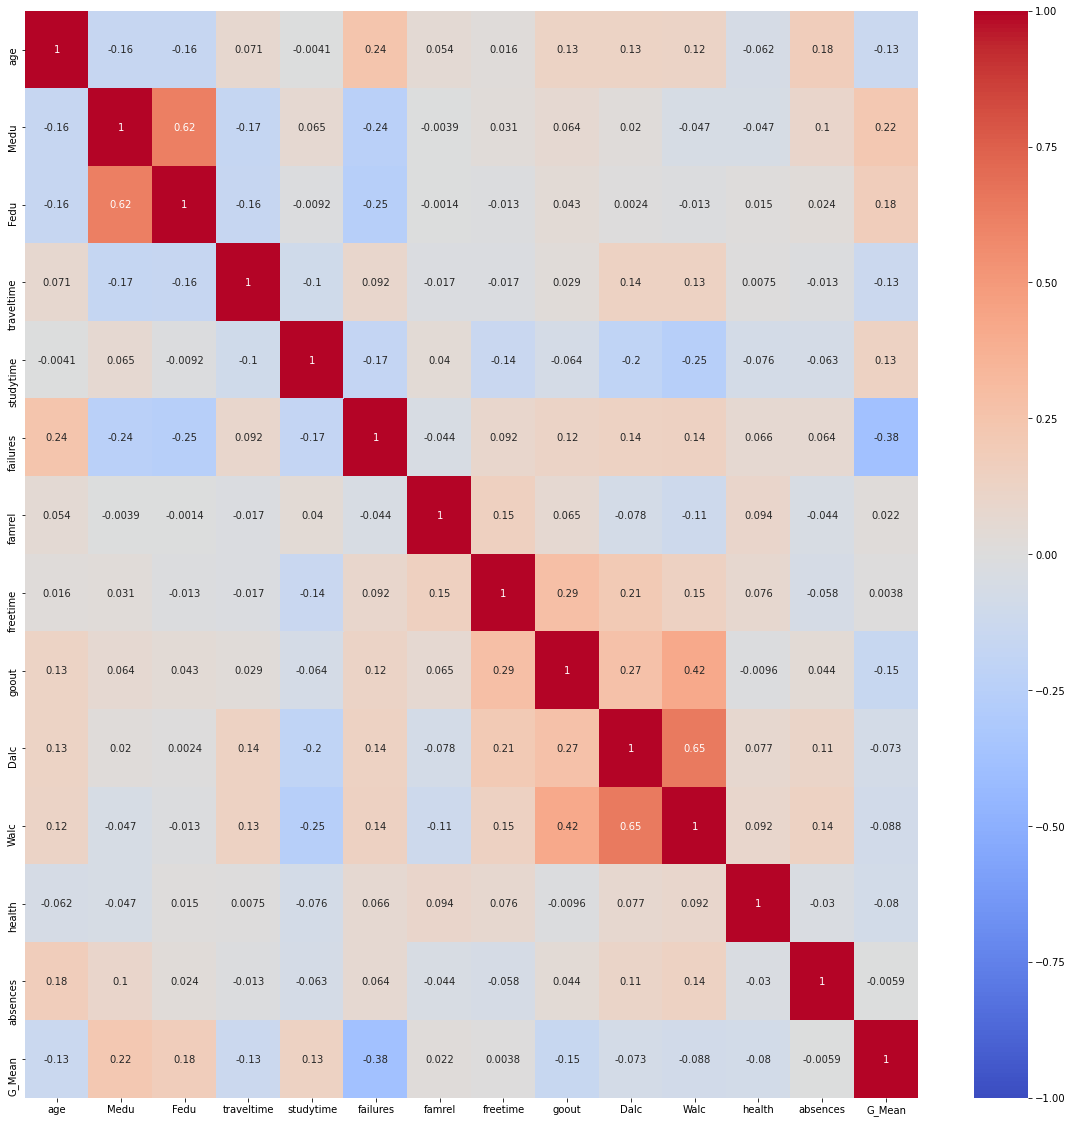

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(new_alcdata.corr(), vmin=-1, cmap="coolwarm", annot=True) #same thing can be seen from the correlation as well

<AxesSubplot:xlabel='sex', ylabel='count'>

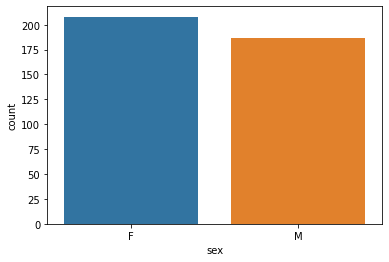

In [11]:
sns.countplot('sex', data = new_alcdata)

<AxesSubplot:xlabel='sex', ylabel='G_Mean'>

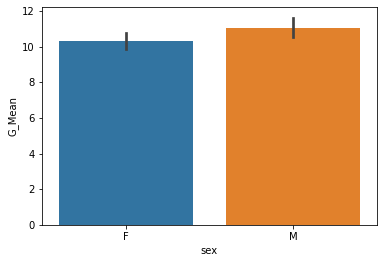

In [12]:
sns.barplot(x= 'sex', y = 'G_Mean', data = new_alcdata)

So we can observe there is not much impact of sex on the average grade column. It was also inferred from Predictive Power Score matrix

<AxesSubplot:xlabel='Pstatus', ylabel='count'>

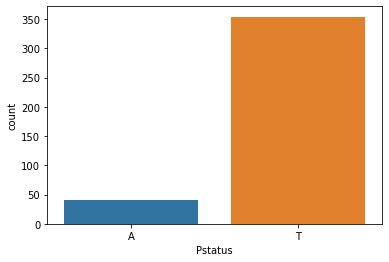

In [13]:
sns.countplot('Pstatus', data = new_alcdata)

<AxesSubplot:xlabel='Pstatus', ylabel='G_Mean'>

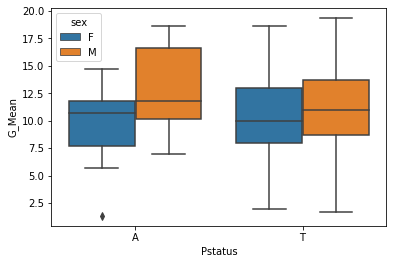

In [15]:
sns.boxplot(x = 'Pstatus', y = 'G_Mean', hue='sex', data = new_alcdata)

With respect to Pstatus, we can observe that when Pstatus = A, male students are performing better than their female counterpart but when Pstatus = T, there is not much difference between the performance of male and female students.

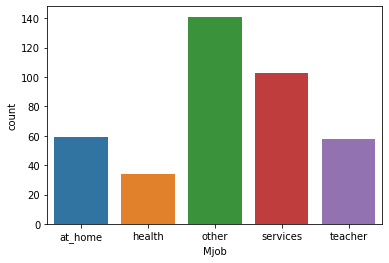

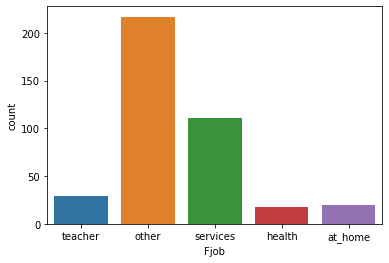

In [16]:
sns.countplot('Mjob', data = new_alcdata)
plt.show()
sns.countplot('Fjob', data = new_alcdata)
plt.show()

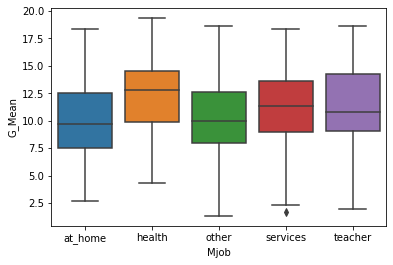

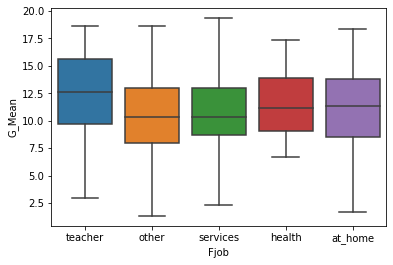

In [17]:
sns.boxplot(x=new_alcdata['Mjob'], y = new_alcdata['G_Mean'])
plt.show()
sns.boxplot(x=new_alcdata['Fjob'], y = new_alcdata['G_Mean'])
plt.show()

Based on the Fjob, if Fjob = teacher, the average grade is a bit better. But in case of Mjob, when Mjob = health ie mother's are associated with health related servcies, the average grade is higher. But there also an outlier in case of Mjob =  services where the grade goes down much below the average.

Otherwise Mjob and Fjob doesn't impact much on the average grade.

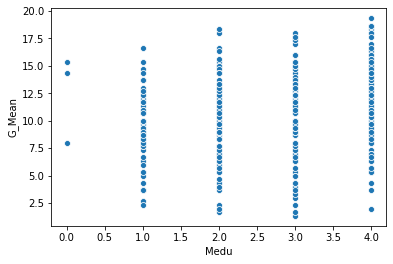

<AxesSubplot:xlabel='Fedu', ylabel='G_Mean'>

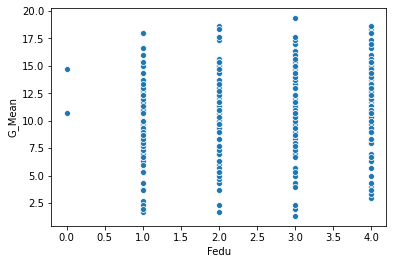

In [28]:
sns.scatterplot(x = 'Medu', y = 'G_Mean', data = new_alcdata)
plt.show()
sns.scatterplot(x = 'Fedu', y = 'G_Mean', data = new_alcdata)

As the Medu and Fedu increases, there is an increase in the average grade as well.

### 2. If there is a need for encoding some of the features,  how would you go  about it? 
Would you consider combining certain encodings together ?


In [29]:
new_alcdata.select_dtypes(include='object') # There are 17 features having dtypes as object
# we have already seen from predictive pre processor matrix that school, pstatus, higher have more impact on the average grade
# so we can assign some ranking to these columns and the for the other columns, they are nominal data
# for the ordinal columns we will go with the Label encoding and for the nominal column we will do One hot encoding

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [30]:
encode_alcdata = new_alcdata.copy() # keeping a copy and not the same object reference so that we can use new_alcdata later on

In [31]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
# Label Encoding the following columns as the student's average grade is better when these have appropriate value.
# Hence using Label Encoder, we are trying to put them in some order.
lencoder = LabelEncoder() 
encode_alcdata['school'] = lencoder.fit_transform(encode_alcdata['school'])
encode_alcdata['higher'] = lencoder.fit_transform(encode_alcdata['higher'])
encode_alcdata['Pstatus'] = lencoder.fit_transform(encode_alcdata['Pstatus'])

In [32]:
# for the other categorical columns we will do One hot encoding
for object_feature in encode_alcdata.dtypes[encode_alcdata.dtypes == 'object'].index :
     encode_alcdata[object_feature] = encode_alcdata[object_feature].astype('category')
for object_feature in encode_alcdata.dtypes[encode_alcdata.dtypes == 'category'].index :
     encode_alcdata[object_feature] = pd.get_dummies(encode_alcdata[object_feature])

In [33]:
encode_alcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    int32  
 1   sex         395 non-null    uint8  
 2   age         395 non-null    int64  
 3   address     395 non-null    uint8  
 4   famsize     395 non-null    uint8  
 5   Pstatus     395 non-null    int32  
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    uint8  
 9   Fjob        395 non-null    uint8  
 10  reason      395 non-null    uint8  
 11  guardian    395 non-null    uint8  
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    uint8  
 16  famsup      395 non-null    uint8  
 17  paid        395 non-null    uint8  
 18  activities  395 non-null    uint8  
 19  nursery     395 non-null    u

### 3. Try to find out how family relation(famrel) and parents cohabitation(Pstatus) affect grades of students.

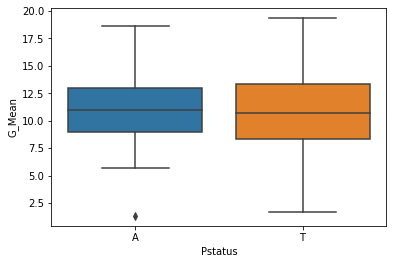

<AxesSubplot:xlabel='famrel', ylabel='G_Mean'>

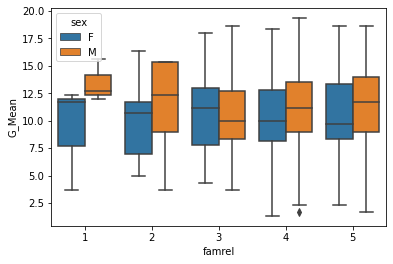

In [34]:
sns.boxplot(x = 'Pstatus', y = 'G_Mean', data = new_alcdata)
plt.show()
sns.boxplot(x = 'famrel', y = 'G_Mean', hue='sex', data = new_alcdata)

The Pstatus feature doesn't impact much on the grades of the student.
But for famrel, there is an impact. The male students tends to perform better when the famrel is very low comapred to their female counterpart. When famrel>=3, both the male and female students perform at par with each other.

In [35]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
# dumm.Pstatus
# dumm.famrel
# dumm.G_Mean
# Create the pandas DataFrame 
data = {'Pstatus': encode_alcdata.Pstatus, 'Famrel': encode_alcdata.famrel, 'G_Mean': encode_alcdata.G_Mean}
df = pd.DataFrame(data, columns = ['Pstatus', 'Famrel', 'G_Mean'])
df

,Pstatus,Famrel,G_Mean
0,0,4,5.666667
1,1,5,5.333333
2,1,4,8.333333
3,1,3,14.666667
4,1,4,8.666667
...,...,...,...
390,0,5,9.000000
391,1,2,15.333333
392,1,5,8.333333
393,1,4,11.000000


<AxesSubplot:>

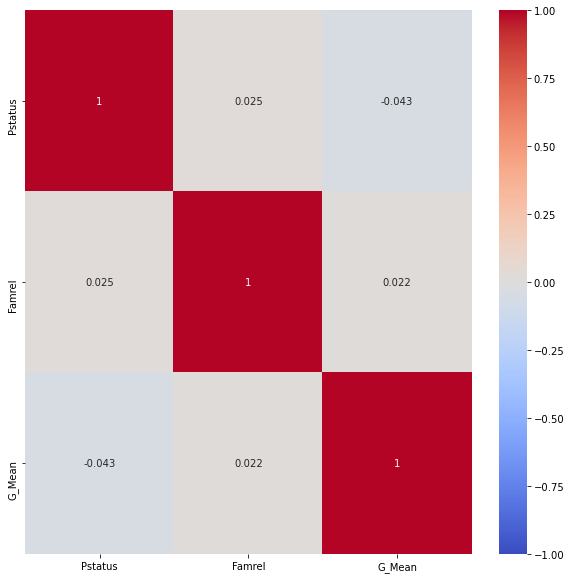

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap="coolwarm", annot=True)


### 4. Figure out which features in the data are skewed, and propose a way to remove skew from all such columns. 

**skewness = 0**: normally distributed,
**skewness > 0**: more weight in the left tail of the distribution(left skewed),
**skewness < 0**: more weight in the right tail of the distribution(right skewed). 

In [36]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer.
skew_df = new_alcdata.skew()
skew_df

age           0.466270
Medu         -0.318381
Fedu         -0.031672
traveltime    1.607029
studytime     0.632142
failures      2.387026
famrel       -0.951882
freetime     -0.163351
goout         0.116502
Dalc          2.190762
Walc          0.611960
health       -0.494604
absences      3.671579
G_Mean       -0.140547
dtype: float64

In [37]:
mean_absences = np.average(new_alcdata.absences)
mean_absences

5.708860759493671

We can observe from skew matrix values that the feature 'absences' is left skewed. So we can apply log function on it to make it normally distributed. Before applying log function on it, we need to replace the the 0 values with the mean otherwise log function cannot be applied.

In [38]:
check = new_alcdata['absences'].replace(0, mean_absences)

<AxesSubplot:xlabel='absences'>

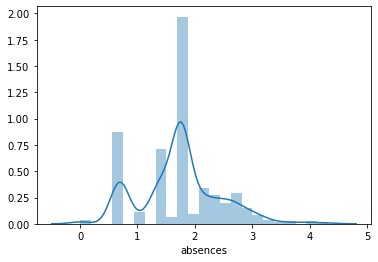

In [42]:
sns.distplot(np.log(check), kde = True)

<AxesSubplot:xlabel='age'>

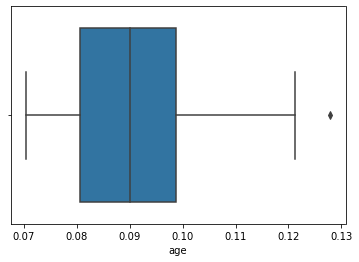

In [152]:
sns.boxplot(np.log10(np.log10(new_alcdata.age)))

In [43]:
np.log(new_alcdata['Dalc'])

0      0.000000
1      0.000000
2      0.693147
3      0.000000
4      0.000000
         ...   
390    1.386294
391    1.098612
392    1.098612
393    1.098612
394    1.098612
Name: Dalc, Length: 395, dtype: float64

In the Workday Alcohol Consumption(Dalc) feature also, it's left skewed and hence we apply log on it. But before apply for the second time, we replace the 0's generated by the previous log function with the mean of the log values generated earlier.

C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Dalc'>

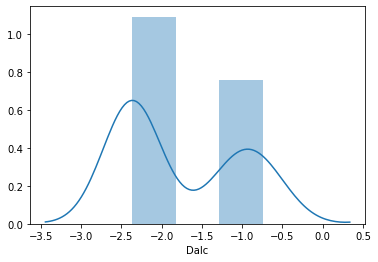

In [44]:
sns.distplot(np.log(np.log(np.log(new_alcdata['Dalc']).replace(0, np.mean(np.log(new_alcdata['Dalc']))))), kde = True)

From the skew matrix, it can be seen that that the 'famrel' feature is having negative skew that is it's right skewed. To remove the skewness from the data we apply the power function it.

<AxesSubplot:xlabel='famrel'>

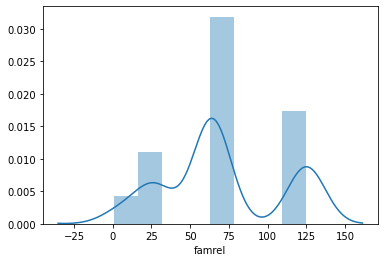

In [156]:
sns.distplot(np.power(new_alcdata['famrel'],3), kde = True)

# Part - 2
## FIFA 2019  Data

### 1. Which clubs are the most economical? How did you decide that?

In [46]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
fifadata

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [47]:
fifadata.fillna(value=0, inplace=True) # filling the null values with 0
fifadata[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head() # we have to convert these values into integers for further processing

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [48]:
def skillConversions(x) :
    if type(x) == str :
        return eval(x)
    else :
        return x

In [49]:
# Converting the following columns from string to the integer value for evaluation.
columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM','RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
for col in columns :
    fifadata[col] = fifadata[col].apply(skillConversions) # converting the string values to integers

In [50]:
fifadata[['Height', 'Weight']].head() # Need to convert height and weight as well

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [51]:
def heightConversion(x) :
    if type(x) == str :
        y = x.split("'")
        return int(y[0]) * 12 + int(y[1])
    else :
        return int(x)

def weightConversion(x) :
    if type(x) == str :
        return int(x.split('lbs')[0])
    else :
        return int(x)

In [52]:
fifadata['Height'] = fifadata['Height'].apply(heightConversion)
fifadata['Weight'] = fifadata['Weight'].apply(weightConversion)

In [53]:
# Preprocessing the data to fill with meaningful data where some redundancy is there.
fifadata['Body Type'][fifadata['Body Type'] == 'Messi'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 'Ronaldo'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'C. Ronaldo'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'Neymar'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'Courtois'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 'PLAYER_BODY_TYPE_25'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 'Shaqiri'] = 'Lean'
fifadata['Body Type'][fifadata['Body Type'] == 'Akinfenwa'] = 'Normal'
fifadata['Body Type'][fifadata['Body Type'] == 0] = 'Normal'
fifadata['Preferred Foot'][fifadata['Preferred Foot'] == 0] = 'NA'
fifadata['Work Rate'][fifadata['Work Rate'] == 0] = 'Medium/ Medium'
fifadata['Real Face'][fifadata['Real Face'] == 0] = 'No'
fifadata['Position'][fifadata['Position'] == 0] = 'NA'

C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [55]:
# This method is used to modify the Wage and Value Value attributes of the data by removing the "€" symbol.
def modifyValue(x):
    return x.replace('€','')

In [56]:
wage = fifadata['Wage'].apply(modifyValue)
fifadata['Wage'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int) 
# Evaluating the Wage and Value attributes to their proper integer value

In [57]:
value = fifadata['Value'].apply(modifyValue)
fifadata['Value'] = wage.replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [60]:
fifadata['Club'].nunique() # There are 652 unique clubs present in the dataset

652

In [61]:
# fifadata.Club.value_counts()
clubData = {'Club': fifadata.Club, 'Overall' : fifadata.Overall, 'Wage': fifadata.Wage}
clubDataDf = pd.DataFrame(clubData, columns = ['Club', 'Overall', 'Wage'])
clubDataDf

,Club,Overall,Wage
0,FC Barcelona,94,565000
1,Juventus,94,405000
2,Paris Saint-Germain,92,290000
3,Manchester United,91,260000
4,Manchester City,91,355000
...,...,...,...
18202,Crewe Alexandra,47,1000
18203,Trelleborgs FF,47,1000
18204,Cambridge United,47,1000
18205,Tranmere Rovers,47,1000


In [62]:
dicti = dict(fifadata.Club.value_counts())
def findValue(x):
    return dicti[x]

In [63]:
clubDataDf.dropna(inplace = True)
overallList =[]
p = 0;
for i in clubDataDf.values:
    overallList.append(i[1]/findValue(i[0])) 
    # Dividing the Overall of each row by the Club count so that when we do groupby, we get the appropriate mean Overall value for the club
x = np.reshape(overallList, (len(overallList), 1)) 
new_club_data = clubDataDf.drop(columns = ['Overall'], inplace = False)
new_club_data['Overall'] = x

In [69]:
new_club_data['Overall'].isnull().unique()

array([False])

In [70]:
new_club_data = new_club_data.groupby(by = 'Club', as_index=False).sum() # Grouping the data by the Clubs and taking their sum.
new_club_data['Economy'] = new_club_data['Overall'] / new_club_data['Wage']

In [71]:
# Interpreatation of Economy : How much overall a Club can get for every Euro spent.
new_club_data.sort_values(by=['Economy'], ascending=True).head(10) # Top 10 economical Clubs

,Club,Wage,Overall,Economy
471,Real Madrid,5017000,78.242424,0.000016
213,FC Barcelona,4837000,78.030303,0.000016
375,Manchester City,3741000,76.727273,0.000021
376,Manchester United,3391000,77.242424,0.000023
135,Chelsea,3249000,76.787879,0.000024
327,Juventus,3292000,82.280000,0.000025
364,Liverpool,2902000,76.000000,0.000026
53,Arsenal,2588000,75.181818,0.000029
584,Tottenham Hotspur,2623000,76.696970,0.000029
215,FC Bayern München,2286000,77.000000,0.000034


<AxesSubplot:xlabel='Club', ylabel='Economy'>

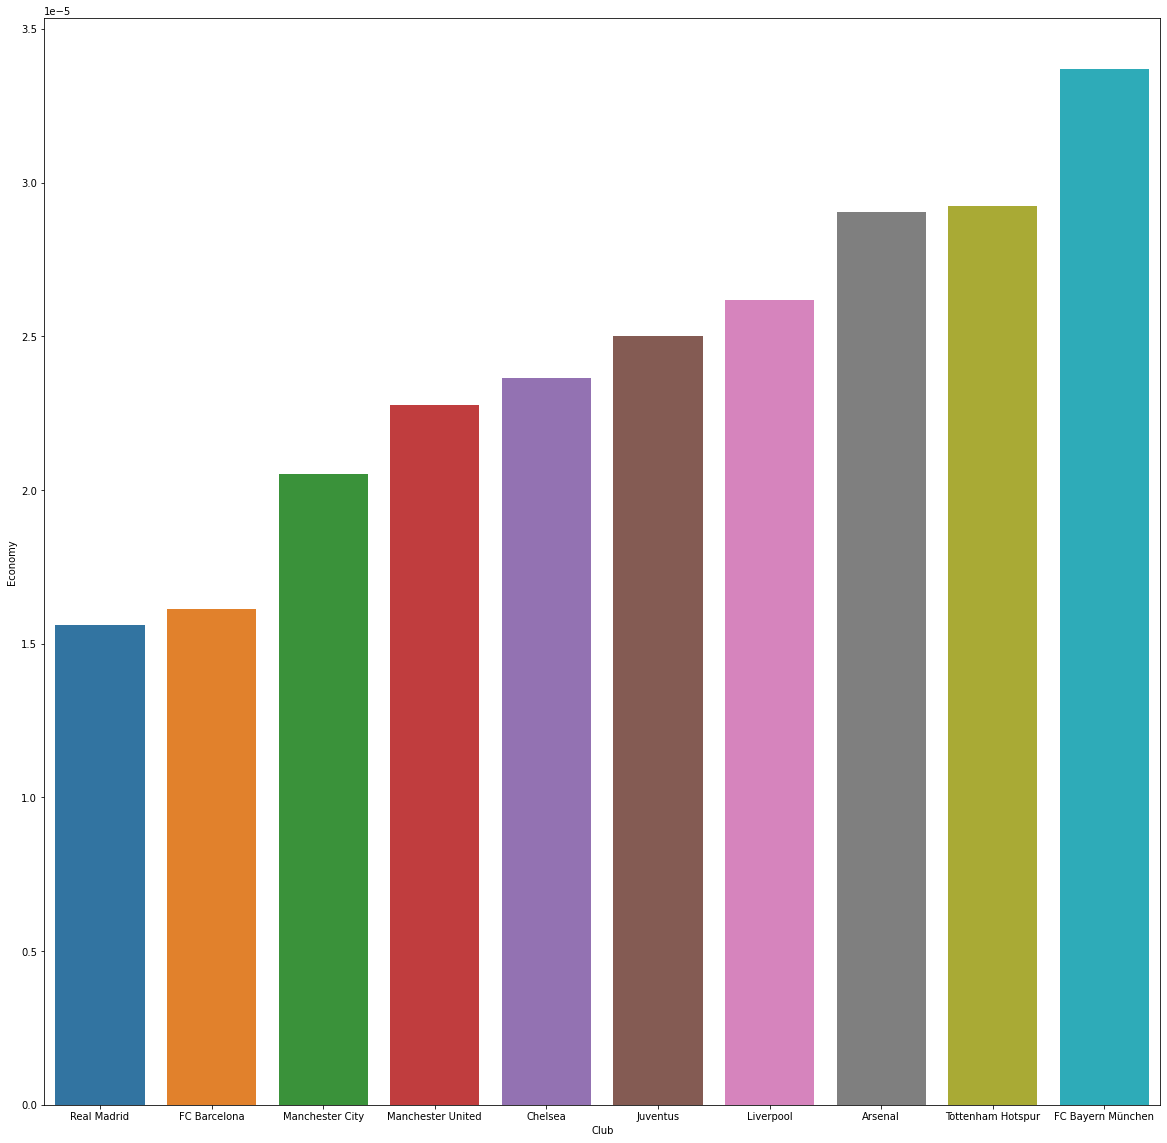

In [72]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'Club', y = 'Economy', data = new_club_data.sort_values(by='Economy', ascending = True). head(10))

### 2. What is the relationship between age and individual potential of the player? How does age influence the players' value? At what age does the player exhibit peak pace ?

In [73]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
# Age, Potential, SprintSpeed
data = {'Age': fifadata.Age, 'Potential' : fifadata.Potential}
performanceDataDf = pd.DataFrame(data, columns = ['Age', 'Potential'])
# performanceDataDf.dropna(inplace = True)
performanceDataDf

,Age,Potential
0,31,94
1,33,94
2,26,93
3,27,93
4,27,92
...,...,...
18202,19,65
18203,19,63
18204,16,67
18205,17,66


<AxesSubplot:xlabel='Age', ylabel='Potential'>

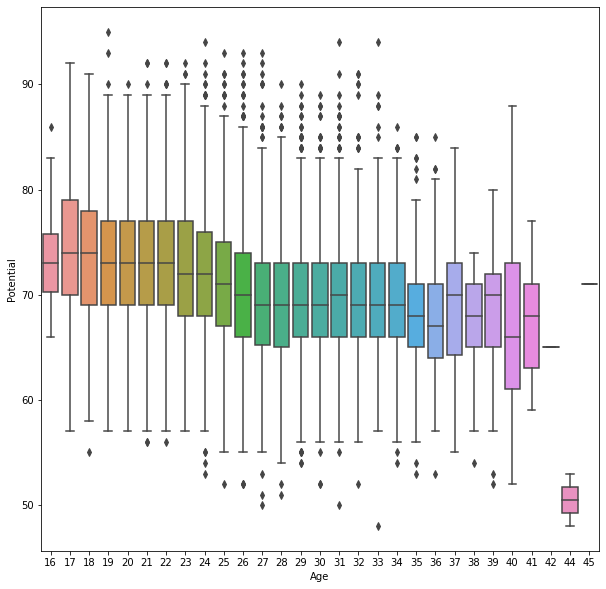

In [74]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'Age', y = 'Potential', data = performanceDataDf)

<AxesSubplot:xlabel='Age', ylabel='Potential'>

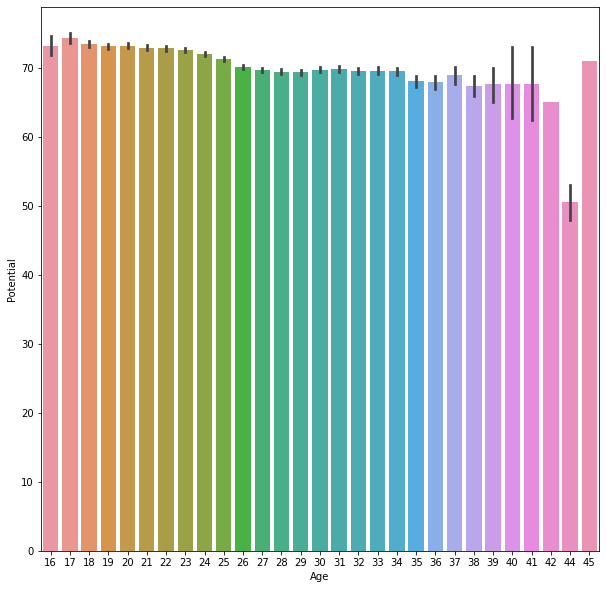

In [233]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Age', y = 'Potential', data = performanceDataDf)

We can observe that the Age is inversely proportional to the Potential of the player. A player shows average peak potential at the age of 17 and the maximum potential  at the age of 19 which can be seen as an outlier in the boxplot. After that it decreases and remain almost the same till the age of 34. There are also a lot of outliers which indicates that despite being of higher ager, the player shows higher potential which is an exception for some cases.

We can also observe the same through the correlation matrix below.

In [76]:
scaler = StandardScaler()

In [77]:
performanceDataDf_standardised = scaler.fit_transform(performanceDataDf[['Age','Potential']])
performanceDataDf_standardised = pd.DataFrame(performanceDataDf_standardised, columns = ['Age', 'Potential'])
performanceDataDf_standardised.corr()

,Age,Potential
Age,1.000000,-0.253312
Potential,-0.253312,1.000000


<AxesSubplot:>

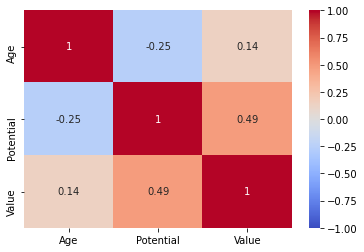

In [78]:
sns.heatmap(performanceDataDf.corr(),vmin=-1,cmap='coolwarm',annot=True)
# As it is negative value in the correlation matrix, we can conclude that Age and Potential  are inversely proportional.

In [75]:
performanceDataDf['Value'] = fifadata['Value']
performanceDataDf

,Age,Potential,Value
0,31,94,565000
1,33,94,405000
2,26,93,290000
3,27,93,260000
4,27,92,355000
...,...,...,...
18202,19,65,1000
18203,19,63,1000
18204,16,67,1000
18205,17,66,1000


<AxesSubplot:xlabel='Age', ylabel='Value'>

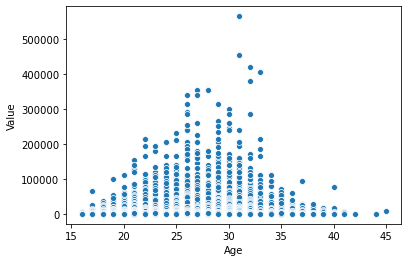

In [79]:
sns.scatterplot(x = 'Age', y = 'Value', data = performanceDataDf, palette = 'Set1')

There is a steep increase in the Value of a Player till the age of 27-28years and after that it gradually starts decreasing, It hits the lowest at the age of 45 and the Value hits the highest in the age between 25-30.

In [80]:
ageValue_df = scaler.transform(performanceDataDf[['Age','Value']])
ageValue_df = pd.DataFrame(ageValue_df, columns = ['Age','Value'])
ageValue_df.corr()

,Age,Value
Age,1.000000,0.141145
Value,0.141145,1.000000


<AxesSubplot:>

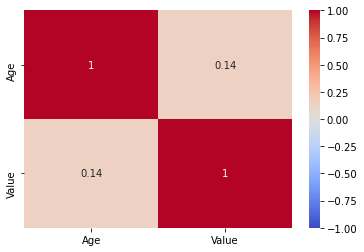

In [81]:
sns.heatmap(ageValue_df.corr(), vmin=-1,cmap='coolwarm',annot=True) # not a very strong relationship. With the heatmap it can seen that they are Value is not impacted much by Age.

In [82]:
performanceDataDf['Pace'] = fifadata.SprintSpeed

In [83]:
mean_pace = np.mean(performanceDataDf['Pace'])
mean_pace = round(mean_pace, 1)
performanceDataDf['Pace'].fillna(value = mean_pace, inplace = True)
performanceDataDf

,Age,Potential,Value,Pace
0,31,94,565000,86.0
1,33,94,405000,91.0
2,26,93,290000,90.0
3,27,93,260000,58.0
4,27,92,355000,76.0
...,...,...,...,...
18202,19,65,1000,57.0
18203,19,63,1000,39.0
18204,16,67,1000,69.0
18205,17,66,1000,60.0


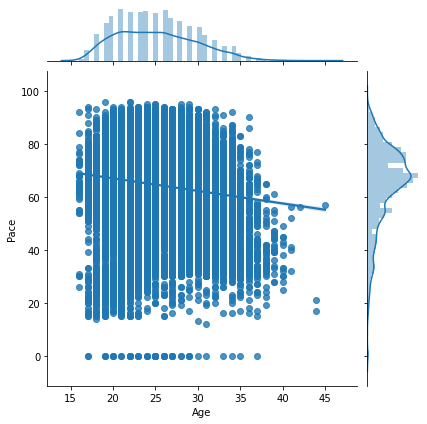

In [84]:
sns.jointplot(performanceDataDf['Age'], performanceDataDf['Pace'], kind = 'reg')
# The player attains maximum pace towards the age of 20years(20-24years approx).
# It can be seen that the Pace data is right skewed with mean almost at 65.
# The pace of a player is at the lowest at the age of 45

### 3. What skill sets are helpful in deciding a player's potential? How do the traits contribute to the players' potential? 

In [85]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
# skill sets to decide a player's potential 
skill_data_df = fifadata[["Crossing","Finishing","HeadingAccuracy","ShortPassing","Volleys","Dribbling","Curve","FKAccuracy",
                         "LongPassing","BallControl","Acceleration","SprintSpeed","Agility","Reactions","Balance","ShotPower",
                         "Jumping","Stamina","Strength","LongShots","Aggression","Interceptions","Positioning","Vision",
                         "Penalties","Composure","Marking","StandingTackle","SlidingTackle","GKDiving","GKHandling","GKKicking",
                         "GKPositioning","GKReflexes", "Potential"]]
skill_data_df.drop_duplicates()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Potential
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,93
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,93
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,65
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,63
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,67
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,66


In [86]:
# replacing the null values with the minimum of the column values
for index in skill_data_df.columns :
    skill_data_df[index].fillna(value = skill_data_df[index].min(), inplace = True)

C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


<AxesSubplot:>

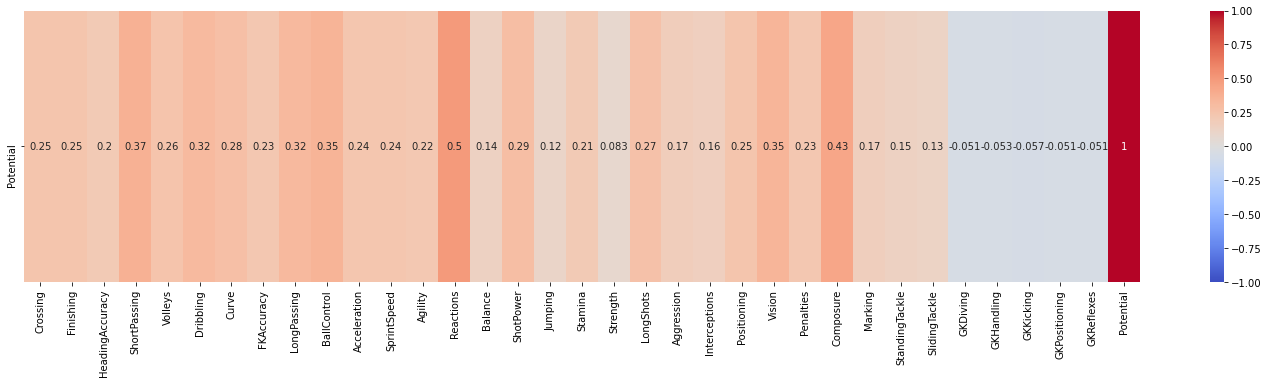

In [87]:
plt.figure(figsize=(25,5))
a = skill_data_df.corr().loc['Potential':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True)

From the Heatmap, we can observe that Reactions, Composure, Vision and ShortPassing are the only columns which have comparatively greater impact on the Potentail of a player.

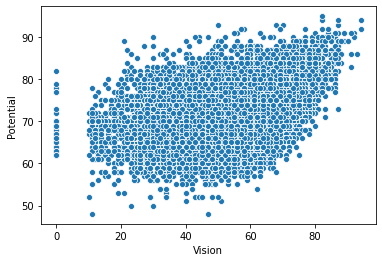

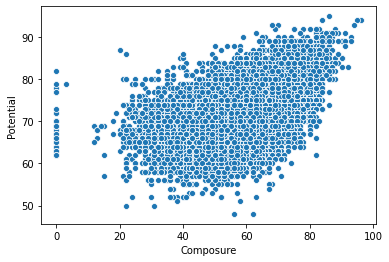

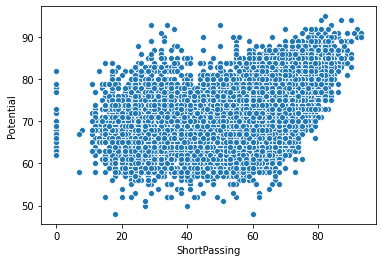

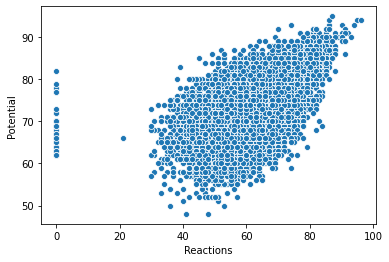

In [92]:
sns.scatterplot(x = 'Vision', y = 'Potential', data = skill_data_df)
plt.show()
sns.scatterplot(x = 'Composure', y = 'Potential', data = skill_data_df)
plt.show()
sns.scatterplot(x = 'ShortPassing', y = 'Potential', data = skill_data_df)
plt.show()
sns.scatterplot(x = 'Reactions', y = 'Potential', data = skill_data_df)
plt.show()

In [93]:
# Traits vs Player's Potential
skill_data_df

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Potential
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,93
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,93
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,65
18203,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,63
18204,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,67
18205,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,66


In [94]:
trails_potential_df = {'Special' : fifadata['Special'], 'Height' : fifadata['Height'], 'Weight' : fifadata['Weight'],
                      'Agility' : fifadata['Agility'], 'Composure' : fifadata['Composure'], 'Potential' : fifadata['Potential']}
trails_potential_df = pd.DataFrame(trails_potential_df)
trails_potential_df

,Special,Height,Weight,Agility,Composure,Potential
0,2202,67,159,91.0,96.0,94
1,2228,74,183,87.0,95.0,94
2,2143,69,150,96.0,94.0,93
3,1471,76,168,60.0,68.0,93
4,2281,71,154,79.0,88.0,92
...,...,...,...,...,...,...
18202,1307,69,134,60.0,45.0,65
18203,1098,75,170,38.0,42.0,63
18204,1189,68,148,50.0,41.0,67
18205,1228,70,154,52.0,46.0,66


In [95]:
scaler = StandardScaler()
trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']] = scaler.fit_transform(trails_potential_df[['Special', 'Weight', 'Height', 'Agility', 'Composure', 'Potential']])

In [96]:
trails_potential_df

,Special,Height,Weight,Agility,Composure,Potential
0,2.216573,-0.924129,-0.368612,1.831868,3.175799,3.698092
1,2.311958,0.626007,0.983773,1.566992,3.091125,3.698092
2,2.000121,-0.481233,-0.875757,2.162962,3.006452,3.535128
3,-0.465223,1.068903,0.138532,-0.220919,0.804937,3.535128
4,2.506397,-0.038337,-0.650359,1.037241,2.498410,3.372164
...,...,...,...,...,...,...
18202,-1.066885,-0.481233,-1.777347,-0.220919,-1.142557,-1.027862
18203,-1.833636,0.847455,0.251231,-1.677735,-1.396578,-1.353790
18204,-1.499788,-0.702681,-0.988456,-0.883108,-1.481252,-0.701934
18205,-1.356710,-0.259785,-0.650359,-0.750670,-1.057883,-0.864898


In [97]:
potential = trails_potential_df.corr().loc['Potential':]
potential

,Special,Height,Weight,Agility,Composure,Potential
Potential,0.383727,0.024638,0.011892,0.224803,0.434343,1.0


<AxesSubplot:>

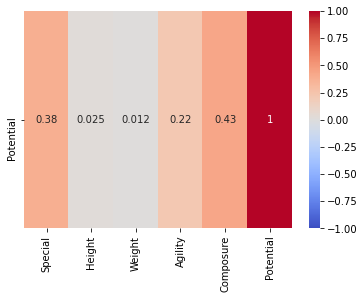

In [98]:
sns.heatmap(potential, vmin=-1, cmap='coolwarm', annot = True)

From the heatmap, we can observe that Composure, Special and Agility have the highest impact among others towards the Potential of a player.

<AxesSubplot:xlabel='Composure', ylabel='Potential'>

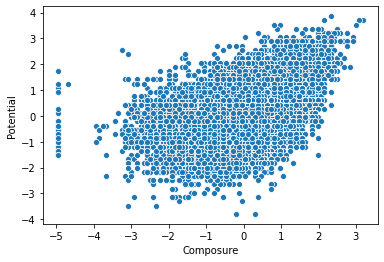

In [99]:
sns.scatterplot(x = 'Composure', y = 'Potential', data = trails_potential_df)

<AxesSubplot:xlabel='Special', ylabel='Potential'>

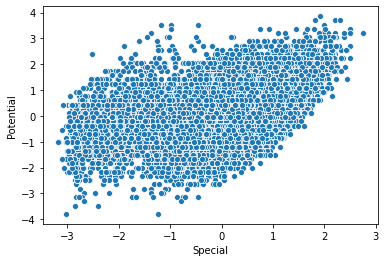

In [100]:
sns.scatterplot(x = 'Special', y = 'Potential', data = trails_potential_df)

<AxesSubplot:xlabel='Special', ylabel='Potential'>

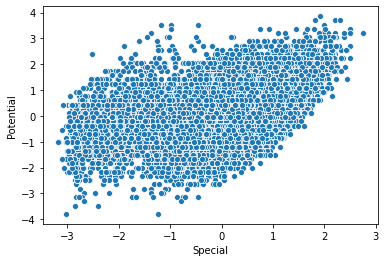

In [102]:
sns.scatterplot(x = 'Special', y = 'Potential', data = trails_potential_df)

### 4. Which features directly contribute to the wages of the players?

In [103]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
wage_data = {'Potential' : skill_data_df['Potential'], 'Overall' : fifadata['Overall'], 'Value' : fifadata['Value'],
             'Special' : fifadata['Special'], 'International Reputation' : fifadata['International Reputation'],
             'Wage' : fifadata['Wage']}
wage_data_df = pd.DataFrame(wage_data)
wage_data_df

,Potential,Overall,Value,Special,International Reputation,Wage
0,94,94,565000,2202,5.0,565000
1,94,94,405000,2228,5.0,405000
2,93,92,290000,2143,5.0,290000
3,93,91,260000,1471,4.0,260000
4,92,91,355000,2281,4.0,355000
...,...,...,...,...,...,...
18202,65,47,1000,1307,1.0,1000
18203,63,47,1000,1098,1.0,1000
18204,67,47,1000,1189,1.0,1000
18205,66,47,1000,1228,1.0,1000


In [104]:
wage_data_df['International Reputation'].unique() # Need to replace null values. we will fill it woth International Reputation as 0

array([5., 4., 3., 2., 1., 0.])

In [105]:
# wage_data_df.info()
wage_data_df['International Reputation'].fillna(value=0, inplace=True)

In [106]:
wage_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential                 18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Value                     18207 non-null  int32  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18207 non-null  float64
 5   Wage                      18207 non-null  int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 711.3 KB


In [107]:
for object_feature in wage_data_df.dtypes[wage_data_df.dtypes == 'object'].index :
    wage_data_df[object_feature] = wage_data_df[object_feature].astype('category') # encoding the category type columns for training the model

In [108]:
wage_data_df.info()
for object_feature in wage_data_df.dtypes[wage_data_df.dtypes == 'category'].index :
    wage_data_df[object_feature] = pd.get_dummies(wage_data_df[object_feature])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential                 18207 non-null  int64  
 1   Overall                   18207 non-null  int64  
 2   Value                     18207 non-null  int32  
 3   Special                   18207 non-null  int64  
 4   International Reputation  18207 non-null  float64
 5   Wage                      18207 non-null  int32  
dtypes: float64(1), int32(2), int64(3)
memory usage: 711.3 KB


In [109]:
# wage_data_df
scaler = StandardScaler()
wage_data_df[['Value', 'Wage', 'Special']] = scaler.fit_transform(wage_data_df[['Value', 'Wage', 'Special']])

In [110]:
wage_data_df

,Potential,Overall,Value,Special,International Reputation,Wage
0,94,94,25.240993,2.216573,5.0,25.240993
1,94,94,17.967832,2.311958,5.0,17.967832
2,93,92,12.740247,2.000121,5.0,12.740247
3,93,91,11.376529,-0.465223,4.0,11.376529
4,92,91,15.694969,2.506397,4.0,15.694969
...,...,...,...,...,...,...
18202,65,47,-0.396902,-1.066885,1.0,-0.396902
18203,63,47,-0.396902,-1.833636,1.0,-0.396902
18204,67,47,-0.396902,-1.499788,1.0,-0.396902
18205,66,47,-0.396902,-1.356710,1.0,-0.396902


<AxesSubplot:>

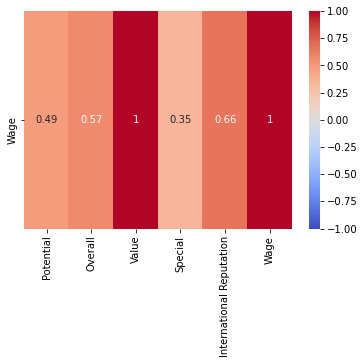

In [111]:
wage_corr_matrix = wage_data_df.corr().loc['Wage':]
sns.heatmap(wage_corr_matrix, vmin=-1, cmap='coolwarm', annot = True)

<AxesSubplot:xlabel='Value', ylabel='Wage'>

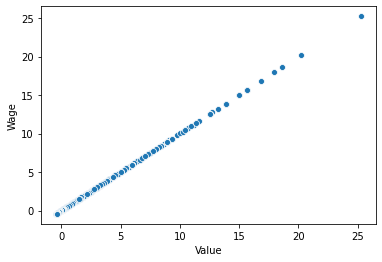

In [112]:
sns.scatterplot(x = 'Value', y ='Wage', data = wage_data_df)

So the Wage of a player is directly proprtional to the Value of a player. If the value of the player increases, the wage of the player also increases monotonically. This is also seen from the Heatmap.

<AxesSubplot:xlabel='International Reputation', ylabel='Wage'>

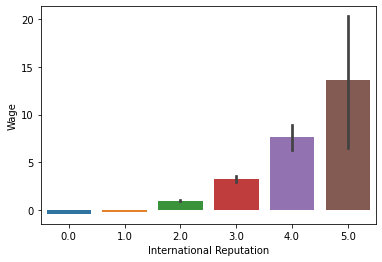

In [282]:
sns.barplot(x = 'International Reputation', y ='Wage', data = wage_data_df)

Same goes for the International Feature of the player. The value increases if the Internaional Reputation of a player increases.

### 5. What is the age distribution in different clubs? Which club has most players young?

In [113]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
# fifadata
data = {'Age': fifadata['Age'], 'Club' : fifadata['Club']}
age_club_datadf = pd.DataFrame(data)
age_club_datadf

,Age,Club
0,31,FC Barcelona
1,33,Juventus
2,26,Paris Saint-Germain
3,27,Manchester United
4,27,Manchester City
...,...,...
18202,19,Crewe Alexandra
18203,19,Trelleborgs FF
18204,16,Cambridge United
18205,17,Tranmere Rovers


In [114]:
datas = age_club_datadf.groupby(by='Club', as_index=False).mean() # grouping the data by clubs and getting their mean age
datas = datas.sort_values(by = 'Age', ascending = True) 
# sorting the grouped by club data according to age in order to get youngest age group club in the beginning
datas.head(10) 
# FC Nordsjælland club has the most young players

,Club,Age
232,FC Nordsjælland,20.259259
222,FC Groningen,21.423077
84,Bohemian FC,21.480000
238,FC Sochaux-Montbéliard,21.678571
211,FC Admira Wacker Mödling,21.925926
349,LOSC Lille,22.000000
203,Envigado FC,22.035714
560,Stabæk Fotball,22.074074
72,Barnsley,22.107143
189,Derry City,22.111111


<AxesSubplot:xlabel='Club', ylabel='Age'>

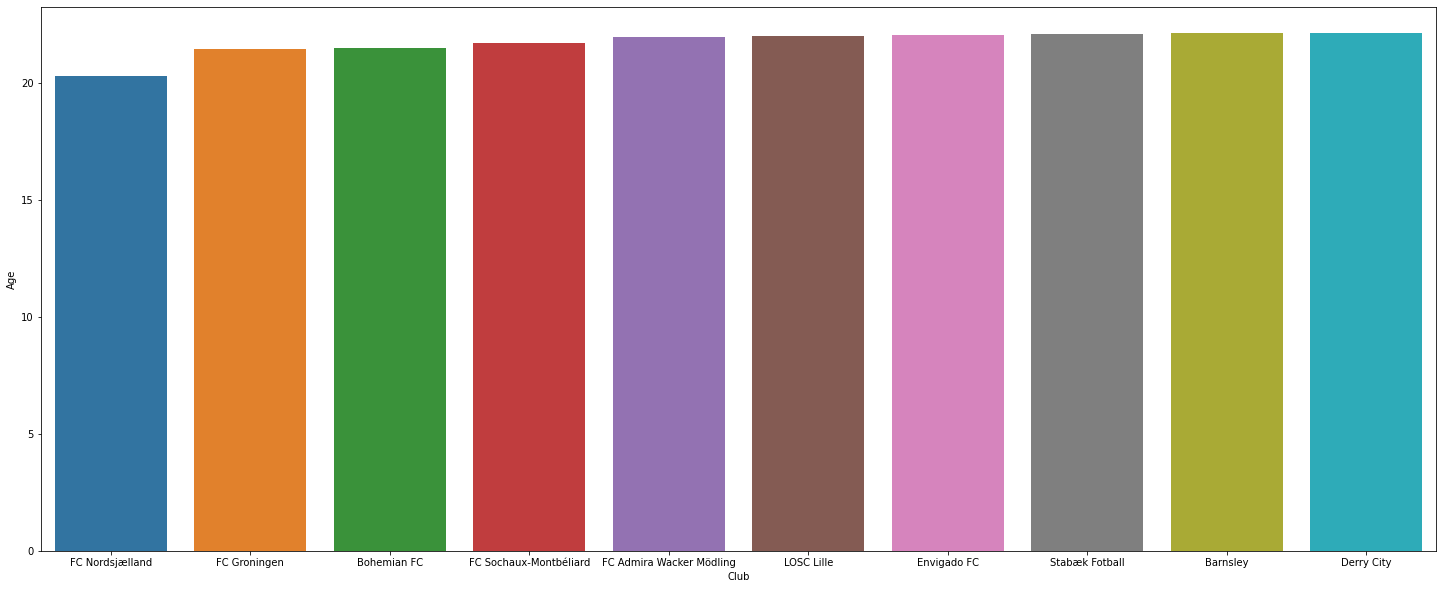

In [115]:
plt.figure(figsize=(25,10))
sns.barplot(x = 'Club', y = 'Age', data = datas.head(10))

# Part - 3
## UK Road Accidents Data


The UK government amassed traffic data from 2000 and 2016, recording over 1.6 million accidents in the process and making this one of the most comprehensive traffic data sets out there. It's a huge picture of a country undergoing change.

### 1. The very first step should be to merge all the 3 subsets of the data.

In [116]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
# accidata1 #2005-2007
# accidata2 #2009-2011
# accidata3 #2012-2014
frames = [accidata1, accidata2, accidata3]
merged_accident_data = pd.concat(frames)

In [117]:
merged_accident_data

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


### 2. What are the number of casualties in each day of the week? Sort them in descending order. 

In [118]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
merged_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [119]:
merged_accident_data['Year'].unique()

array([2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [120]:
# dropping Junction_Detail as this column doesn't contribute anything
# Dropping the Junction_Detail column as all the values are null here. So there is no information that can be retireved from this feature.
merged_accident_data.drop(columns=['Junction_Detail'],inplace = True)

In [121]:
merged_accident_data['Latitude'].unique()

array([51.489096, 51.520075, 51.525301, ..., 54.985668, 54.990446,
       55.1067  ])

In [122]:
# Preprocessing the data and filling the null values with logically identified values from each feature.
merged_accident_data['Road_Surface_Conditions'].fillna(value = 'Normal', inplace = True)
merged_accident_data['Special_Conditions_at_Site'].fillna(value = 'None', inplace = True)
merged_accident_data['Carriageway_Hazards'].fillna(value = 'None', inplace = True)
merged_accident_data['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(value = 'No', inplace = True)
merged_accident_data['Weather_Conditions'].fillna(value = 'Unknown', inplace = True)
merged_accident_data['Junction_Control'].fillna(value = 'None', inplace = True)
merged_accident_data['Location_Northing_OSGR'].fillna(value = 0, inplace = True)
merged_accident_data['Latitude'].fillna(value = 0, inplace = True)

In [123]:
data = {'Casualties_Count' : merged_accident_data['Number_of_Casualties'],
                     'Day_of_Week' : merged_accident_data['Day_of_Week']}
accidents_per_week = pd.DataFrame(data)
accidents_per_week.groupby(by='Day_of_Week').sum().sort_values(by = 'Casualties_Count', ascending = False)

,Casualties_Count
Day_of_Week,
6,331934
5,299044
4,297756
3,294476
7,285261
2,284043
1,239532


<AxesSubplot:xlabel='Day_of_Week', ylabel='count'>

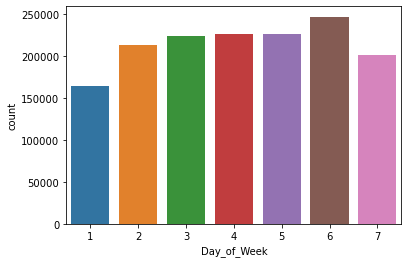

In [323]:
sns.countplot(x=accidents_per_week.Day_of_Week, data=accidents_per_week) # 6th day of the week has seen more number of accidents

### 3. On each day of the week, what is the maximum and minimum speed limit on the roads the accidents happened?

In [124]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
accidents_per_week['Speed_Limit'] = merged_accident_data.Speed_limit
accidents_per_week

,Casualties_Count,Day_of_Week,Speed_Limit
0,1,3,30
1,1,4,30
2,1,5,30
3,1,6,30
4,1,2,30
...,...,...,...
464692,1,1,70
464693,2,5,70
464694,1,3,40
464695,2,4,60


In [224]:
pip install -U pandasql  # Please install Pandas sql using this command

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26821 sha256=b1567b4d1fd31a81a144abc8ebbe4f1b2f859ea6824b9837a87d35db953729aa
  Stored in directory: c:\users\pratap\appdata\local\pip\cache\wheels\a6\64\11\62d5f7b88421a5d80068ac9937fe2915e497da3eba900c8f59
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [125]:
import pandasql as ps

In [126]:
chunks = []
for val in range(1,8) : # Since there are 7 days, we are using the loop from 1 to 8.
    q1 = """select accidents_per_week.Day_of_Week, sum(accidents_per_week.Casualties_Count) Casualties_Count,
            max(accidents_per_week.Speed_Limit) Max_Speed ,min(accidents_per_week.Speed_Limit) Min_Speed
            from accidents_per_week where accidents_per_week.Casualties_Count > 0 and accidents_per_week.Day_of_Week= """+str(val)
    chunks.append(ps.sqldf(q1, locals()))
speed_limit_accident_data = pd.concat(chunks, ignore_index=True)

In [127]:
speed_limit_accident_data

,Day_of_Week,Casualties_Count,Max_Speed,Min_Speed
0,1,239532,70,10
1,2,284043,70,10
2,3,294476,70,10
3,4,297756,70,20
4,5,299044,70,10
5,6,331934,70,10
6,7,285261,70,10


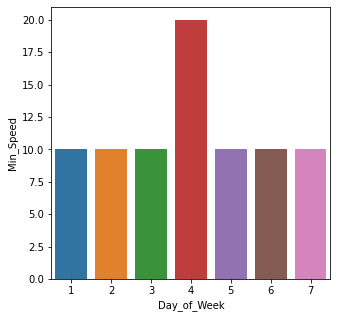

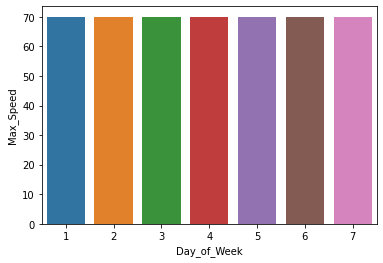

In [128]:
val = ["Max-Speed","Min_Speed"]
plt.figure(figsize=(5,5))
sns.barplot(x='Day_of_Week', y = 'Min_Speed' , data=speed_limit_accident_data)
plt.show()
sns.barplot(x='Day_of_Week', y = 'Max_Speed' , data=speed_limit_accident_data)
plt.show()

### 4. What is the importance of Light and Weather conditions in predicting accident severity? What does your intuition say and what does the data portray?

In [129]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
accident_severity_data = {'Light_Conditions' : merged_accident_data.Light_Conditions, 'Weather_Conditions' : merged_accident_data.Weather_Conditions,
                       'Accident_Severity' : merged_accident_data.Accident_Severity}
accident_severity_df = pd.DataFrame(accident_severity_data)
accident_severity_df

,Light_Conditions,Weather_Conditions,Accident_Severity
0,Daylight: Street light present,Raining without high winds,2
1,Darkness: Street lights present and lit,Fine without high winds,3
2,Darkness: Street lights present and lit,Fine without high winds,3
3,Daylight: Street light present,Fine without high winds,3
4,Darkness: Street lighting unknown,Fine without high winds,3
...,...,...,...
464692,Darkeness: No street lighting,Snowing without high winds,2
464693,Darkeness: No street lighting,Fine without high winds,3
464694,Darkness: Street lights present and lit,Fine without high winds,3
464695,Darkeness: No street lighting,Raining without high winds,2


In [130]:
# merged_accident_data
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Light_Conditions    1504150 non-null  object
 1   Weather_Conditions  1504150 non-null  object
 2   Accident_Severity   1504150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 45.9+ MB


In [131]:
for object_feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
     accident_severity_df[object_feature] = accident_severity_df[object_feature].astype('category')

In [132]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 3 columns):
 #   Column              Non-Null Count    Dtype   
---  ------              --------------    -----   
 0   Light_Conditions    1504150 non-null  category
 1   Weather_Conditions  1504150 non-null  category
 2   Accident_Severity   1504150 non-null  int64   
dtypes: category(2), int64(1)
memory usage: 25.8 MB


In [133]:
# One Hot Encoding the categorical columns
accident_severity_df = pd.get_dummies(data=accident_severity_df, columns=['Light_Conditions', 'Weather_Conditions'])

In [134]:
accident_severity_df

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0
464693,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0
464694,3,0,0,1,0,0,0,1,0,0,0,0,0,0,0
464695,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
accident_severity = accident_severity_df.corr().loc['Accident_Severity':]
accident_severity = pd.DataFrame(accident_severity)

In [136]:
# np.hstack(np.split(accident_severity, 1))
accident_severity

,Accident_Severity,Light_Conditions_Darkeness: No street lighting,Light_Conditions_Darkness: Street lighting unknown,Light_Conditions_Darkness: Street lights present and lit,Light_Conditions_Darkness: Street lights present but unlit,Light_Conditions_Daylight: Street light present,Weather_Conditions_Fine with high winds,Weather_Conditions_Fine without high winds,Weather_Conditions_Fog or mist,Weather_Conditions_Other,Weather_Conditions_Raining with high winds,Weather_Conditions_Raining without high winds,Weather_Conditions_Snowing with high winds,Weather_Conditions_Snowing without high winds,Weather_Conditions_Unknown
Accident_Severity,1.000000,-0.071174,0.002657,-0.018362,-0.003769,0.053096,-0.005982,-0.025910,-0.004042,0.012961,0.000549,0.018437,0.003080,0.010913,0.017108
Light_Conditions_Darkeness: No street lighting,-0.071174,1.000000,-0.025083,-0.119369,-0.016370,-0.399076,0.018572,-0.074911,0.058249,0.037683,0.048193,0.033486,0.028193,0.031123,-0.015329
Light_Conditions_Darkness: Street lighting unknown,0.002657,-0.025083,1.000000,-0.051555,-0.007070,-0.172360,-0.002335,-0.044742,0.005986,0.002229,0.000384,-0.006382,0.000715,0.003057,0.140243
Light_Conditions_Darkness: Street lights present and lit,-0.018362,-0.119369,-0.051555,1.000000,-0.033648,-0.820269,0.006970,-0.093839,0.011799,0.031787,0.041990,0.081967,0.001151,0.016986,-0.012381
Light_Conditions_Darkness: Street lights present but unlit,-0.003769,-0.016370,-0.007070,-0.033648,1.000000,-0.112492,0.003017,-0.018033,0.005796,0.008136,0.010302,0.012519,0.002725,0.001946,-0.001917
Light_Conditions_Daylight: Street light present,0.053096,-0.399076,-0.172360,-0.820269,-0.112492,1.000000,-0.015741,0.136071,-0.042865,-0.049729,-0.064212,-0.091339,-0.016129,-0.032296,-0.013322
Weather_Conditions_Fine with high winds,-0.005982,0.018572,-0.002335,0.006970,0.003017,-0.015741,1.000000,-0.222582,-0.008224,-0.016776,-0.013166,-0.040677,-0.004015,-0.009670,-0.015425
Weather_Conditions_Fine without high winds,-0.025910,-0.074911,-0.044742,-0.093839,-0.018033,0.136071,-0.222582,1.000000,-0.148175,-0.302260,-0.237214,-0.732891,-0.072337,-0.174238,-0.277918
Weather_Conditions_Fog or mist,-0.004042,0.058249,0.005986,0.011799,0.005796,-0.042865,-0.008224,-0.148175,1.000000,-0.011168,-0.008765,-0.027079,-0.002673,-0.006438,-0.010268
Weather_Conditions_Other,0.012961,0.037683,0.002229,0.031787,0.008136,-0.049729,-0.016776,-0.302260,-0.011168,1.000000,-0.017879,-0.055238,-0.005452,-0.013132,-0.020947


<AxesSubplot:>

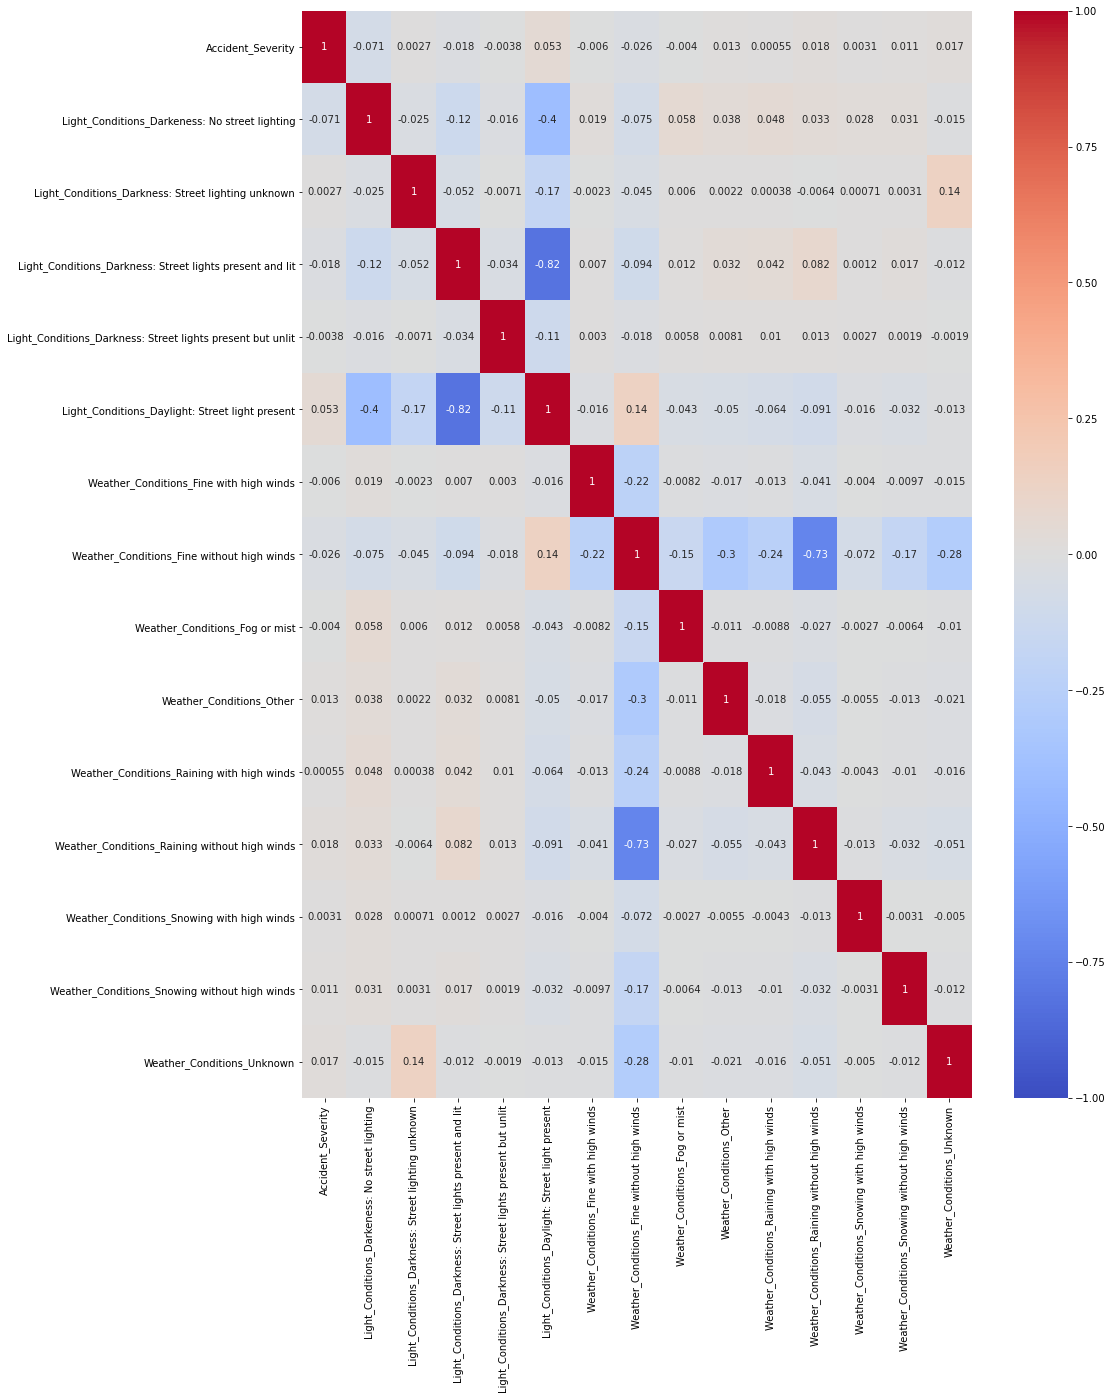

In [137]:
plt.figure(figsize=(15,20))
sns.heatmap(accident_severity, vmin=-1, cmap='coolwarm', annot = True)

**Intuition:**  As per our intuition, we can say that the number of accidents will be more when the light and weather conditions are at worse. Like when there is no there light present at night, the number of accidents could be more. Similarly, in bad weather conditions like too mych winds, rainfall or snowing could lead to more number of accidents.

**From Data:** From the above correlation matrix of the data, we can observe that both Light_conditions and Weather_Conditions doesn't have much effect on Accident_severity as they are almost close to 0. Light_conditions with Street Light present is more impactful compared to Weather_Conditions.

So the interpretation could be like when Street Light is present compared Daytime, the number of accidents being caused and their severity are much higher.

### 5. To predict the severity of the accidents which columns do you think are unnecessary and should be dropped before implementing a regression model. Support your statement using relevant plots and hypotheses derived from them.

In [138]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer.
# From the above correlation, we have seen that Light_Conditions and Weather_Conditions are not much impactful, so we can drop them
accident_severity_df =merged_accident_data.copy()
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [139]:
accident_severity_df['Pedestrian_Crossing-Human_Control'].value_counts() # can be dropped as almost 90% of the data is None
accident_severity_df['Pedestrian_Crossing-Physical_Facilities'].value_counts() # can be dropped as almost 80% of the data is None
accident_severity_df['Light_Conditions'].value_counts() # can be dropped as earlier we have seen Light_Conditions & Weather_Conditions are not much impactful
accident_severity_df['Special_Conditions_at_Site'].value_counts() # can be dropped as 90% data is None
accident_severity_df['Carriageway_Hazards'].value_counts() # can be dropped as 90% data is None
# Did_Police_Officer_Attend_Scene_of_Accident can be dropped as Police comes after the accident has occured and it doesn't
# logically impact the severity of the accident
accident_severity_df['Carriageway_Hazards'].value_counts() # can be dropped as 90% data is None 
accident_severity_df['Junction_Control'].value_counts()
# We can also drop Accident_Index as it only keeps the count of the accidents
# We can also drop Date, Time of Accidents as logically they don't impact the Severity of Accidents

Giveway or uncontrolled     733940
None                        602835
Automatic traffic signal    155717
Stop Sign                     9179
Authorised person             2479
Name: Junction_Control, dtype: int64

<AxesSubplot:xlabel='Road_Type', ylabel='Accident_Severity'>

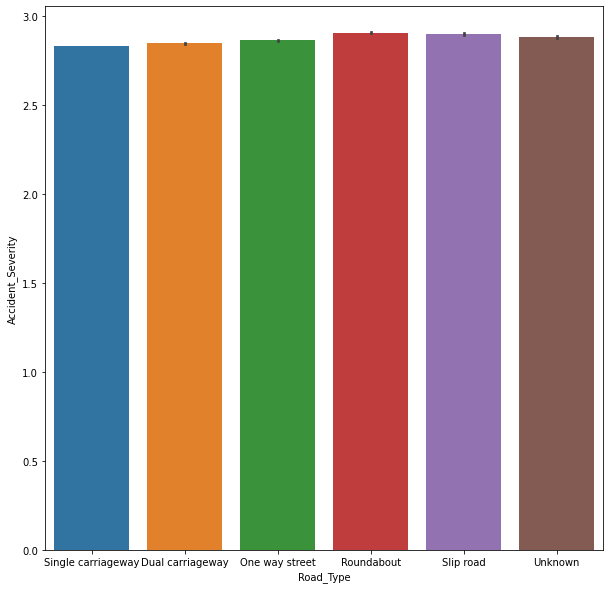

In [140]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Type', y = 'Accident_Severity', data = accident_severity_df)

<AxesSubplot:xlabel='Junction_Control', ylabel='Accident_Severity'>

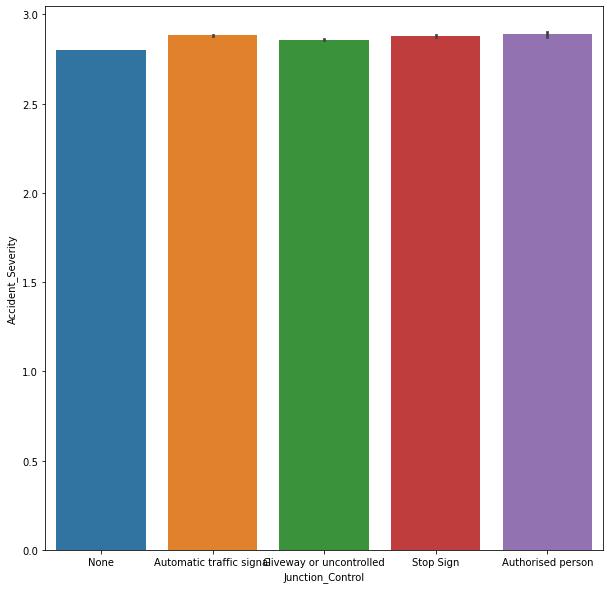

In [141]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Junction_Control', y = 'Accident_Severity', data = accident_severity_df)

<AxesSubplot:xlabel='Road_Surface_Conditions', ylabel='Accident_Severity'>

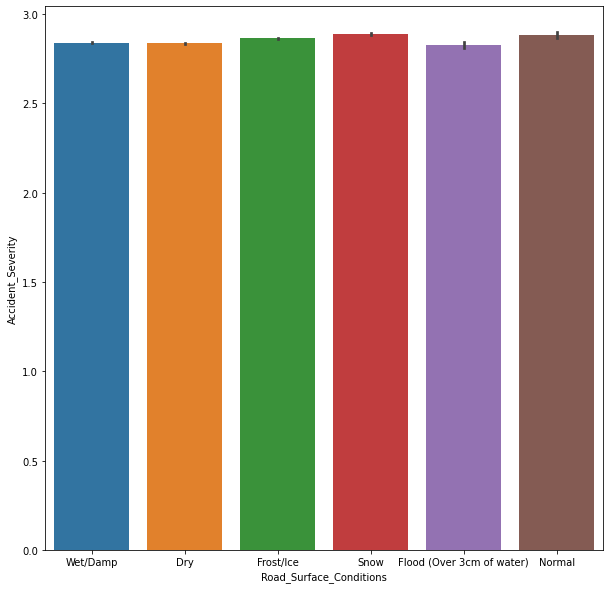

In [142]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Road_Surface_Conditions', y = 'Accident_Severity', data = accident_severity_df)

After analysing, we can observe that all the categorical columns doesn't have any impact on the Accident_Severity.
Hence we can drop the categorical columns from the data.

In [143]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes == 'object'].index :
    accident_severity_df.drop(columns = feature, inplace = True)

In [144]:
accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Location_Easting_OSGR       1504049 non-null  float64
 1   Location_Northing_OSGR      1504150 non-null  float64
 2   Longitude                   1504049 non-null  float64
 3   Latitude                    1504150 non-null  float64
 4   Police_Force                1504150 non-null  int64  
 5   Accident_Severity           1504150 non-null  int64  
 6   Number_of_Vehicles          1504150 non-null  int64  
 7   Number_of_Casualties        1504150 non-null  int64  
 8   Day_of_Week                 1504150 non-null  int64  
 9   Local_Authority_(District)  1504150 non-null  int64  
 10  1st_Road_Class              1504150 non-null  int64  
 11  1st_Road_Number             1504150 non-null  int64  
 12  Speed_limit                 1504150 non-null  int64  
 13

In [145]:
corr_matrix = accident_severity_df.corr()
corr_matrix

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
Location_Easting_OSGR,1.000000,-0.420212,0.999359,-0.422123,-0.356474,0.013465,0.017152,-0.040780,-0.001883,-0.380452,-0.060289,-0.084678,-0.063709,0.044525,-0.000128,-0.095941,0.038404
Location_Northing_OSGR,-0.420212,1.000000,-0.430722,0.962771,0.167844,-0.031392,-0.041357,0.032092,0.003848,0.121125,0.035438,0.043899,0.047655,-0.030743,0.017022,0.053073,-0.013490
Longitude,0.999359,-0.430722,1.000000,-0.432531,-0.369755,0.013946,0.018442,-0.039501,-0.001894,-0.390536,-0.058800,-0.082418,-0.062824,0.045050,0.001401,-0.094278,0.038059
Latitude,-0.422123,0.962771,-0.432531,1.000000,0.156826,-0.030076,-0.039285,0.030983,0.003523,0.112444,0.033848,0.043064,0.044220,-0.028189,0.017234,0.042961,-0.010155
Police_Force,-0.356474,0.167844,-0.369755,0.156826,1.000000,-0.031712,-0.015491,0.007073,0.000428,0.981975,0.044895,-0.000199,0.197990,-0.119040,-0.018276,0.240858,-0.033599
Accident_Severity,0.013465,-0.031392,0.013946,-0.030076,-0.031712,1.000000,0.075976,-0.083544,0.002961,-0.031995,0.012754,-0.004072,-0.079108,0.064321,0.026128,-0.082169,-0.005907
Number_of_Vehicles,0.017152,-0.041357,0.018442,-0.039285,-0.015491,0.075976,1.000000,0.237349,-0.000116,-0.010506,-0.142306,-0.008871,0.084785,0.068607,0.024320,0.041081,-0.007846
Number_of_Casualties,-0.040780,0.032092,-0.039501,0.030983,0.007073,-0.083544,0.237349,1.000000,-0.001455,0.014316,-0.082984,0.007750,0.139551,-0.029212,0.001997,0.115974,-0.015140
Day_of_Week,-0.001883,0.003848,-0.001894,0.003523,0.000428,0.002961,-0.000116,-0.001455,1.000000,0.000325,0.006843,0.002344,-0.015944,0.007822,0.000385,-0.016571,-0.003669
Local_Authority_(District),-0.380452,0.121125,-0.390536,0.112444,0.981975,-0.031995,-0.010506,0.014316,0.000325,1.000000,0.055861,0.010440,0.204926,-0.119100,-0.016618,0.253824,-0.037073


In [146]:
corr_matrix['Accident_Severity'].sort_values(ascending=False)

Accident_Severity             1.000000
Number_of_Vehicles            0.075976
2nd_Road_Class                0.064321
2nd_Road_Number               0.026128
Longitude                     0.013946
Location_Easting_OSGR         0.013465
1st_Road_Class                0.012754
Day_of_Week                   0.002961
1st_Road_Number              -0.004072
Year                         -0.005907
Latitude                     -0.030076
Location_Northing_OSGR       -0.031392
Police_Force                 -0.031712
Local_Authority_(District)   -0.031995
Speed_limit                  -0.079108
Urban_or_Rural_Area          -0.082169
Number_of_Casualties         -0.083544
Name: Accident_Severity, dtype: float64

In [148]:
final_accident_severity_df = accident_severity_df.copy()
final_accident_severity_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Location_Easting_OSGR       1504049 non-null  float64
 1   Location_Northing_OSGR      1504150 non-null  float64
 2   Longitude                   1504049 non-null  float64
 3   Latitude                    1504150 non-null  float64
 4   Police_Force                1504150 non-null  int64  
 5   Accident_Severity           1504150 non-null  int64  
 6   Number_of_Vehicles          1504150 non-null  int64  
 7   Number_of_Casualties        1504150 non-null  int64  
 8   Day_of_Week                 1504150 non-null  int64  
 9   Local_Authority_(District)  1504150 non-null  int64  
 10  1st_Road_Class              1504150 non-null  int64  
 11  1st_Road_Number             1504150 non-null  int64  
 12  Speed_limit                 1504150 non-null  int64  
 13

In [149]:
for feature in accident_severity_df.dtypes[accident_severity_df.dtypes != 'object'].index :
    if(corr_matrix['Accident_Severity'][feature] < 0.02 and  corr_matrix['Accident_Severity'][feature] > -0.02) :
        final_accident_severity_df.drop(columns = feature, inplace = True) 
# deleting the columns with correlation < 0.02 and >-0.02 as they are not much impactful compared to others
#  We have to consider the inversely proportional columns as well as they can impact the Accident_severity

In [150]:
final_accident_severity_df # The impactful columns for Accident_Severity are as follows

,Location_Northing_OSGR,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Local_Authority_(District),Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
0,178240.0,51.489096,1,2,1,1,12,30,-1,0,1
1,181650.0,51.520075,1,3,1,1,12,30,5,0,1
2,182240.0,51.525301,1,3,2,1,12,30,-1,0,1
3,177530.0,51.482442,1,3,1,1,12,30,-1,0,1
4,179040.0,51.495752,1,3,1,1,12,30,-1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
464692,597647.0,55.264773,98,2,2,1,917,70,-1,0,2
464693,574063.0,55.054855,98,3,2,2,917,70,-1,0,2
464694,566365.0,54.985668,98,3,1,1,917,40,-1,0,2
464695,566853.0,54.990446,98,2,3,2,917,60,5,43,2


### 6. Implement a basic Logistic Regression Model using scikit learn with cross validation = 5, where you predict the severity of the accident (Accident_Severity). Note that here your goal is not to tune appropriate hyperparameters, but to figure out what features will be best to use.

In [151]:
#enter code/answer in this cell. You can add more code/markdown cells below for your answer. 
merged_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504150 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504150 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [152]:
check = final_accident_severity_df.copy()
check
severity = check['Accident_Severity']
severity = pd.DataFrame(severity, columns = ['Accident_Severity'])

**Multiclass classification** with logistic regression can be done either through the one-vs-rest scheme in which for each class a binary classification problem of data belonging or not to that class is done, or changing the loss function to cross- entropy loss.

 In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’ and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently, the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.) By default, multi_class is set to ’ovr’.

In [153]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
score = cross_val_score(model, check, severity, cv = 5)
score.mean()

C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\PRATAP\miniconda3\envs\MLEnv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

0.8511125885051358